Visualizing my step data, from a Garmin [vívofit](https://buy.garmin.com/en-US/US/p/143405) (until about May 2016),  a [Forerunner 235](https://buy.garmin.com/en-US/US/p/529988) (May 2016 - June 2019) and a [Forerunner 935](https://buy.garmin.com/en-US/US/p/564291) (since June 2019).
The data has been recorded to the [Apples Health](https://www.apple.com/ios/health/) app by [Garmin Connect](https://connect.garmin.com/).
I exported the data from Apple Health to a [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) file with the [QS Access](http://quantifiedself.com/qs-access-app/) app.

In [1]:
# Load some modules we need
import pandas  # for data manipulation
import matplotlib.pylab as plt  # for plotting
%matplotlib inline
import seaborn  # for plot styling
import dateutil.relativedelta  # for date calculations
import calendar  # for easy day and month names in the tick labels

In [2]:
# Set some defaults
seaborn.set_style('dark')
plt.rcParams['figure.figsize'] = (16, 9)  # Size up figures a bit

In [3]:
# Read in data
data = pandas.read_csv('steps.csv')

In [4]:
# How does it look like?
data.describe()

,Steps (count)
count,2271.000000
mean,7245.718902
std,5477.280501
min,0.000000
25%,2270.000000
50%,7144.000000
75%,11063.000000
max,32821.000000


In [5]:
# Massage data
data.rename(columns={'Start': 'Date'}, inplace=True)
data.rename(columns={'Steps (count)': 'Steps'}, inplace=True)
data.Steps = data.Steps.astype(int)
data.drop('Finish', axis=1, inplace=True)

In [6]:
# How doed it look now?
data.head()

,Date,Steps
0,11-Nov-2014 00:00,38
1,12-Nov-2014 00:00,9122
2,13-Nov-2014 00:00,9327
3,14-Nov-2014 00:00,10588
4,15-Nov-2014 00:00,7493


In [7]:
# Make us a proper date column, based on https://stackoverflow.com/a/26763793
data['Date'] = pandas.to_datetime(data['Date'])

In [8]:
# Make us a year, month and weekday colum, based on https://stackoverflow.com/q/48623332
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Day'] = data.Date.dt.day
data['Weekday'] = data.Date.dt.dayofweek

In [9]:
# How doed it look now?
data.head()

,Date,Steps,Year,Month,Day,Weekday
0,2014-11-11,38,2014,11,11,1
1,2014-11-12,9122,2014,11,12,2
2,2014-11-13,9327,2014,11,13,3
3,2014-11-14,10588,2014,11,14,4
4,2014-11-15,7493,2014,11,15,5


In [10]:
yearwelookat = 2020

In [11]:
# Give out totals to see if we have approximately the same as shown in Garmin Connect
print('In %s I made a total of %0.2f Million steps' % (yearwelookat,
                                                       data[(data.Year == yearwelookat)]['Steps'].sum() * 1e-6))

In 2020 I made a total of 3.03 Million steps


In [12]:
if calendar.isleap(yearwelookat):
    dpy = 366
else:
    dpy = 365

In [13]:
# Give out totals to see if we have approximately the same as shown in Garmin Connect
print('In %s I made %s steps per day' % (yearwelookat,
                                         int(round(data[(data.Year == yearwelookat)]['Steps'].sum() / dpy))))

In 2020 I made 8276 steps per day


In [14]:
# Give out totals to see if we have approximately the same as shown in Garmin Connect
for month in sorted(data.Date.dt.month.unique()):
    print('In %s %s I made a total of %s steps' % (calendar.month_name[month],
                                                   yearwelookat,
                                                   data[(data.Year == yearwelookat) &
                                                        (data.Month == month)]['Steps'].sum()))

In January 2020 I made a total of 225436 steps
In February 2020 I made a total of 211404 steps
In March 2020 I made a total of 270245 steps
In April 2020 I made a total of 190520 steps
In May 2020 I made a total of 204822 steps
In June 2020 I made a total of 213334 steps
In July 2020 I made a total of 255813 steps
In August 2020 I made a total of 243769 steps
In September 2020 I made a total of 232395 steps
In October 2020 I made a total of 248908 steps
In November 2020 I made a total of 343250 steps
In December 2020 I made a total of 389265 steps


In [15]:
# When were the five highest step counts?
data[data.Year == yearwelookat].sort_values('Steps', ascending=False).head()

,Date,Steps,Year,Month,Day,Weekday
2213,2020-12-02,20501,2020,12,2,2
2196,2020-11-15,20086,2020,11,15,6
2220,2020-12-09,18523,2020,12,9,2
2237,2020-12-26,17608,2020,12,26,5
2223,2020-12-12,17489,2020,12,12,5


In [16]:
# When were the five lowest step counts?
data[data.Year == yearwelookat].sort_values('Steps').head()

,Date,Steps,Year,Month,Day,Weekday
1960,2020-03-24,365,2020,3,24,1
1998,2020-05-01,676,2020,5,1,4
1967,2020-03-31,1635,2020,3,31,1
1984,2020-04-17,1767,2020,4,17,4
1974,2020-04-07,2046,2020,4,7,1


In [17]:
# Generate us a nice plot title, with help from https://stackoverflow.com/a/32083946/323100
Duration = dateutil.relativedelta.relativedelta(data[data.Year == yearwelookat].Date.max(),
                                                data[data.Year == yearwelookat].Date.min())

In [18]:
# Generate us some nice tick labels
Ticklabels_weekday = ['%s\n~%g steps' % (d, round(s / 1e3, 1) * 1e3)
                      for (s, d) in zip(data[data.Year == yearwelookat].groupby('Weekday').Steps.mean(),
                                        list(calendar.day_name))]
# Generate us some nice tick labels
Ticklabels_month = ['%s\n~%g steps' % (m, round(s / 1e3, 1) * 1e3)
                    for (s, m) in zip(data[data.Year == yearwelookat].groupby('Month').Steps.mean(),
                                      list(calendar.month_name[1:]))]
# Generate us some nice tick labels
Ticklabels_year = ['%s\n~%g steps' % (y, round(s / 1e3, 1) * 1e3)
                   for (s, y) in zip(data[data.Year == yearwelookat].groupby('Year').Steps.mean(),
                                     data[data.Year == yearwelookat].Year.unique())]

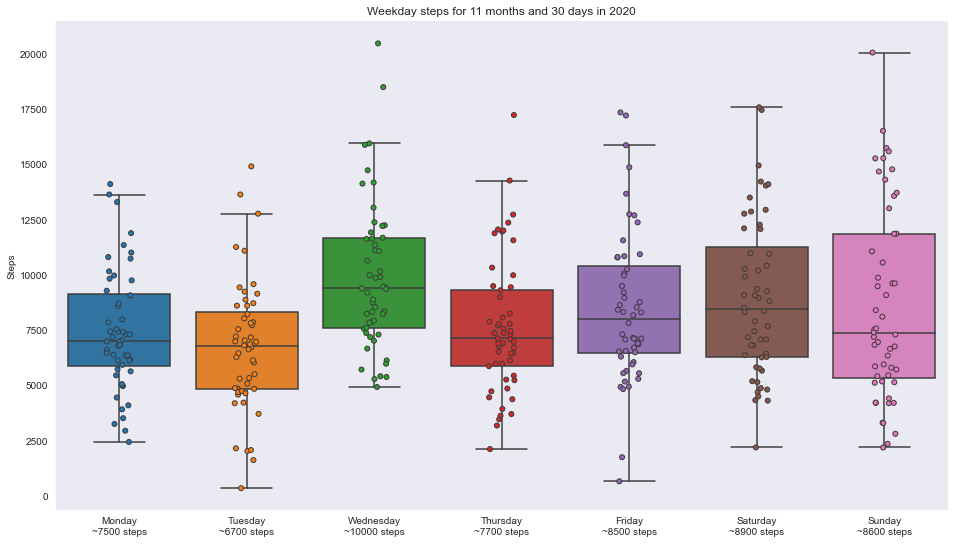

In [19]:
# Plot the steps per weekday
seaborn.boxplot(data=data[data.Year == yearwelookat],
                x='Weekday',
                y='Steps',
                fliersize=0)
seaborn.stripplot(data=data[data.Year == yearwelookat],
                  x='Weekday',
                  y='Steps',
                  jitter=True,
                  linewidth=1)
plt.gca().set_xticklabels(Ticklabels_weekday)
plt.title('Weekday steps for %s months and %s days in %s' % (Duration.months,
                                                             Duration.days,
                                                             yearwelookat))
plt.gca().xaxis.label.set_visible(False)
seaborn.despine()
plt.show()

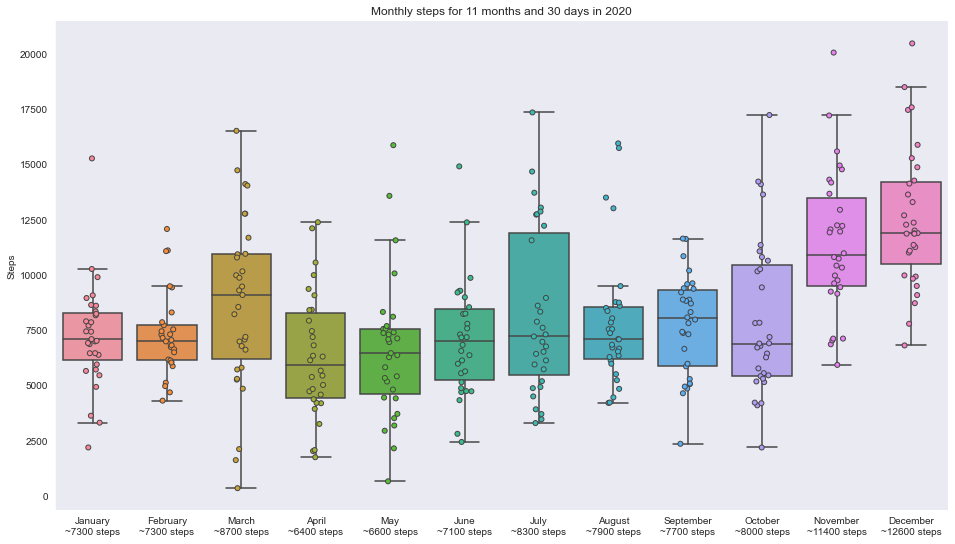

In [20]:
# Plot the steps per month
seaborn.boxplot(data=data[data.Year == yearwelookat],
                x='Month',
                y='Steps',
                fliersize=0)
seaborn.stripplot(data=data[data.Year == yearwelookat],
                  x='Month',
                  y='Steps',
                  jitter=True,
                  linewidth=1)
plt.gca().set_xticklabels(Ticklabels_month)
plt.title('Monthly steps for %s months and %s days in %s' % (Duration.months,
                                                             Duration.days,
                                                             yearwelookat))
plt.gca().xaxis.label.set_visible(False)
seaborn.despine()
plt.show()